In [ ]:
#| default_exp bbox.vis

# Visualization

> API details.

In [ ]:
#|hide
from nbdev.showdoc import *

In [ ]:
#| export
from fastcore.all import *
import PIL
import numpy as np
import polvo as pv
from typing import Tuple
from PIL import Image
from PIL.ImageDraw import ImageDraw
from polvo.bbox import BBox, OBBox

/home/lgvaz/git/polvo/polvo/utils/logging.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
#|export
def overlay(image:PIL.Image, bbox:BBox, color:Tuple[int,int,int]=None):
    """Draws a box on an image with a given color.
    # Arguments
        image     : The image to draw on.
        box       : A list of 4 elements (x1, y1, x2, y2).
        color     : The color of the box.
    """
    draw = PIL.ImageDraw.Draw(image)
    color = color or tuple(((np.random.random(3)*0.6 + 0.4)*255).astype(int))
    bbox_thickness = int(0.0041*min(image.size) - 0.0058)
    bbox_thickness = np.clip(bbox_thickness, 1, 16)
    
    for i in range(4): draw.line(xy=(tuple(bbox.points[i]), tuple(bbox.points[(i+1)%4])), fill=color, width=bbox_thickness)
    return image

In [ ]:
#|export
@patch
@delegates(overlay)
def show(self:BBox, image, **kwargs):
    return overlay(bbox=self, image=image, **kwargs)

<AxesSubplot:>

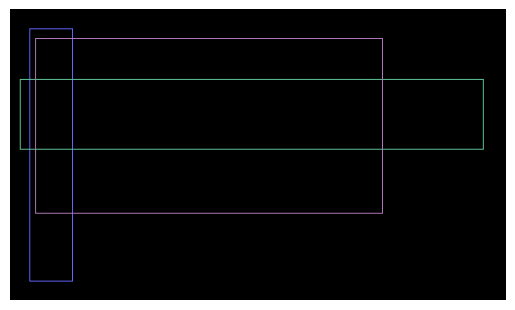

In [ ]:
image = PIL.Image.fromarray(np.zeros((300, 512, 3), dtype=np.uint8))
image = overlay(image, BBox.from_xyxy(20, 20, 64, 280), (100, 100, 255))
image = BBox.from_xywh(10, 72, 478, 72).show(image, color=(100, 200, 155))
image = overlay(image, BBox.from_relative_xcycwh(.4, .4, .7, .6, 512, 300))
pv.show_image(image)

In [ ]:
#|export
@patch
@delegates(overlay)
def show(self:OBBox, image, **kwargs):
    return overlay(bbox=self, image=image, **kwargs)

<AxesSubplot:>

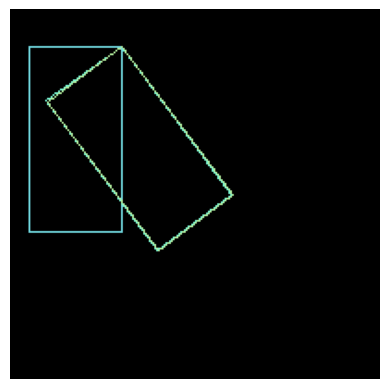

In [ ]:
image = PIL.Image.fromarray(np.zeros((200, 200, 3), dtype=np.uint8))
image = OBBox.from_flat((60,20, 60,120, 10,120, 10,20)).show(image) # non-rotated
image = OBBox.from_clockwise(60,20, 100,50, math.degrees(math.asin(4/5))).show(image) #rotated 
image = OBBox.from_flat((60,20, 120,100, 80,130, 20,50)).show(image) # rotated 
pv.show_image(image)

<AxesSubplot:>

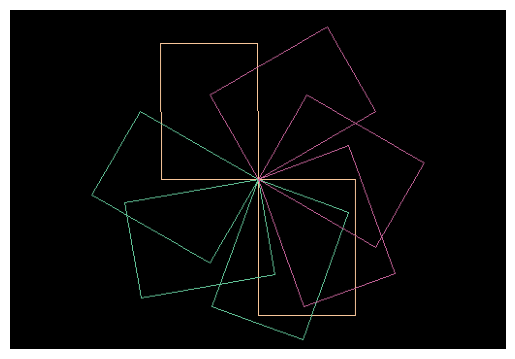

In [ ]:
image = PIL.Image.fromarray(np.zeros((350, 512, 3), dtype=np.uint8))
image = overlay(image, OBBox.from_clockwise(256,175, 100,140, 0), (250, 200, 155))
image = overlay(image, OBBox.from_clockwise(256,175, 100,140, 180), (250, 200, 155))
image = overlay(image, OBBox.from_clockwise(256,175, 100,140, 20), (100, 200, 155))
image = overlay(image, OBBox.from_clockwise(256,175, 100,140, 80), (100, 200, 155))
image = overlay(image, OBBox.from_clockwise(256,175, 100,140, 120), (100, 200, 155))
image = overlay(image, OBBox.from_clockwise(256,175, 100,140, -20), (200, 100, 155))
image = overlay(image, OBBox.from_clockwise(256,175, 100,140, -60), (200, 100, 155))
image = overlay(image, OBBox.from_clockwise(256,175, 100,140, -120), (200, 100, 155))
pv.show_image(image)

In [ ]:
#| hide
from nbdev import nbdev_export
nbdev_export()